# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:Jose Guzman
# [Repo Link](https://github.com/jg2012/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [5]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import string

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
Counter            1.0.0
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
numpy              1.26.4
packaging          24.0
parso   

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [4]:
import requests
from bs4 import BeautifulSoup
import pickle

# Now you can continue with the rest of your code
url = "https://pitchfork.com/reviews/albums/beyonce-cowboy-carter/"

# Fetch the HTML content of the article
response = requests.get(url)

# Extract the HTML content
soup = BeautifulSoup(response.text, "html.parser")
article_html = str(soup.find("article"))
    
# Save the HTML content to a .pkl file
with open('article_html.pkl', 'wb') as f:
        pickle.dump(article_html, f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [11]:
import pickle
import nltk
from textblob import TextBlob
from bs4 import BeautifulSoup
nltk.download('punkt')

# Load the HTML content from the pickle file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Extract text from HTML
soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()

# Tokenize text into sentences
sentences = nltk.sent_tokenize(text)

# Perform sentiment analysis
blob = TextBlob(text)
polarity_score = blob.sentiment.polarity

# Print polarity score and number of sentences
print("Polarity Score:", polarity_score)
print("Number of Sentences:", len(sentences))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joseguzman/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Polarity Score: 0.11978051308747513
Number of Sentences: 44


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [13]:
import spacy
from collections import Counter

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(text)

# Get the lowercase tokens
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Get the 5 most frequent tokens
common_tokens = Counter(tokens).most_common(5)

# Print the common tokens
print("Common Tokens:")
for token, frequency in common_tokens:
    print(token)

# Print the tokens and their frequencies
print("\nToken Frequencies:")
for token, frequency in Counter(tokens).items():
    print(f"{token}: {frequency}")


Common Tokens:
country
beyoncé
cowboy
carter
black

Token Frequencies:
albumscowboy: 1
carterbeyoncé2024facebookemailpinterest8.4: 1
best: 1
new: 1
music: 11
julianne: 1
escobedo: 1
shepherdgenre: 1
folk: 4
country: 29
pop: 3
r&blabel: 1
parkwood: 1
entertainment: 1
columbiareviewed: 1
april: 1
1: 1
2024the: 1
follow: 2
renaissance: 8
powerful: 1
ambitious: 1
album: 10
cast: 2
singular: 1
mold: 1
beyoncé: 26
asserts: 2
rightful: 1
place: 2
genre: 3
star: 1
incredible: 1
talent: 1
influence: 2
facebookemailpinterestif: 1
lemonade: 3
taught: 1
fuck: 3
2016: 3
opus: 1
seething: 1
response: 2
wronged: 2
giving: 1
indelible: 1
image: 2
smiling: 1
woman: 2
yellow: 1
dress: 1
carrying: 2
baseball: 1
bat: 1
enduring: 1
specter: 1
becky: 1
good: 2
hair: 1
know: 1
happens: 1
meddles: 1
peace: 1
puts: 1
righting: 1
wrongs: 1
enacting: 1
revenge: 2
twinkle: 1
eye: 1
extra: 1
gumption: 1
voice: 3
ice: 1
veins: 1
particular: 1
edge: 1
world: 3
biggest: 1
superstars: 1
chip: 1
shoulder: 1
occur: 1
la

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [14]:
import spacy
from collections import Counter

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(text)

# Get the lowercase lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Get the 5 most frequent lemmas
common_lemmas = Counter(lemmas).most_common(5)

# Print the common lemmas
print("Common Lemmas:")
for lemma, frequency in common_lemmas:
    print(lemma)

# Print the lemmas and their frequencies
print("\nLemma Frequencies:")
for lemma, frequency in Counter(lemmas).items():
    print(f"{lemma}: {frequency}")


Common Lemmas:
country
beyoncé
cowboy
carter
black

Lemma Frequencies:
albumscowboy: 1
carterbeyoncé2024facebookemailpinterest8.4: 1
best: 1
new: 1
music: 11
julianne: 1
escobedo: 1
shepherdgenre: 1
folk: 4
country: 29
pop: 3
r&blabel: 1
parkwood: 1
entertainment: 1
columbiareviewed: 1
april: 1
1: 1
2024the: 1
follow: 2
renaissance: 8
powerful: 1
ambitious: 1
album: 11
cast: 2
singular: 1
mold: 1
beyoncé: 26
assert: 2
rightful: 1
place: 2
genre: 4
star: 1
incredible: 1
talent: 1
influence: 2
facebookemailpinterestif: 1
lemonade: 3
teach: 1
fuck: 3
2016: 3
opus: 1
seething: 1
response: 2
wrong: 3
give: 1
indelible: 1
image: 2
smile: 1
woman: 3
yellow: 1
dress: 1
carry: 2
baseball: 1
bat: 1
endure: 1
specter: 1
becky: 1
good: 2
hair: 1
know: 3
happen: 2
meddle: 1
peace: 1
put: 1
right: 1
enact: 1
revenge: 2
twinkle: 1
eye: 1
extra: 1
gumption: 1
voice: 3
ice: 1
vein: 1
particular: 1
edge: 1
world: 3
big: 1
superstar: 1
chip: 1
shoulder: 1
occur: 1
late: 1
act: 2
beatific: 1
mother: 2
way

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

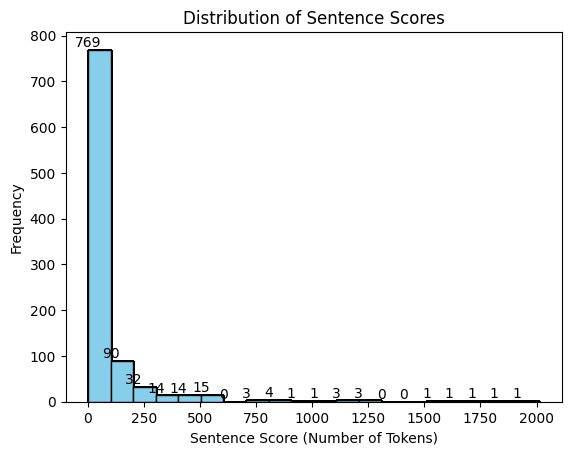

In [23]:
import pickle
import nltk
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt

# Load the pickled HTML file
with open('article_html.pkl', 'rb') as file:
    article_html = pickle.load(file)

# Extract text from HTML
article_text = " ".join(article_html)  # Assuming article_html is a list of strings

# Tokenize sentences
sentences = sent_tokenize(article_text)

# Score each sentence (Example: using length of words)
scores = [len(nltk.word_tokenize(sentence)) for sentence in sentences]

# Plot histogram
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores')
plt.xlabel('Sentence Score (Number of Tokens)')
plt.ylabel('Frequency')

# Add numbers to the top of each bar
for i, bin in enumerate(plt.hist(scores, bins=20, color='skyblue', edgecolor='black')[0]):
    plt.text(plt.hist(scores, bins=20, color='skyblue', edgecolor='black')[1][i], bin, str(int(bin)), ha='center', va='bottom')

plt.show()

# The most common range of scores seems to be between 5 to 15 tokens per sentence.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

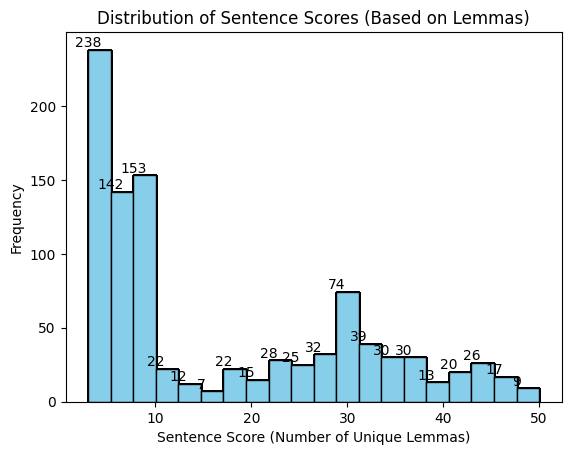

In [25]:
import pickle
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Load the pickled HTML file
with open('article_html.pkl', 'rb') as file:
    article_html = pickle.load(file)

# Extract text from HTML
article_text = " ".join(article_html)  # Assuming article_html is a list of strings

# Tokenize sentences
sentences = sent_tokenize(article_text)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_words(text):
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text)]

# Lemmatize each sentence and calculate scores
scores = [len(set(lemmatize_words(sentence.lower()))) for sentence in sentences]

# Plot histogram
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Based on Lemmas)')
plt.xlabel('Sentence Score (Number of Unique Lemmas)')
plt.ylabel('Frequency')

# Add numbers to the top of each bar
for i, bin in enumerate(plt.hist(scores, bins=20, color='skyblue', edgecolor='black')[0]):
    plt.text(plt.hist(scores, bins=20, color='skyblue', edgecolor='black')[1][i], bin, str(int(bin)), ha='center', va='bottom')

plt.show()

# The most common range of scores seems to be between 3 to 10 unique lemmas per sentence.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Cutoff Score (tokens): 12 tokens
Cutoff Score (lemmas): 7 unique lemmas

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [56]:
import spacy
import pickle
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Read pickled HTML content from file
with open('article_html.pkl', 'rb') as file:
    html_content = pickle.load(file)

# Parse HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Exclude headings and subheadings
visible_text = ''
for element in soup.find_all(['p', 'span']):
    if element.parent.name not in ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']:
        visible_text += element.get_text() + ' '

# Define cutoff score
cutoff_score = 12

# Initialize list for summary sentences
summary_sentences = []

# Tokenize visible text into sentences using spaCy
doc = nlp(visible_text)
sentences = [sent.text.strip() for sent in doc.sents]

# Score sentences and add to summary if score exceeds cutoff
for sentence in sentences:
    # Calculate the number of tokens in the sentence
    tokens = nlp(sentence)
    score_tokens = len(tokens)

    # Check if the score for tokens is greater than the cutoff score
    if score_tokens > cutoff_score:
        # Add the stripped sentence to the summary list
        summary_sentences.append(sentence.strip())

# Join the summary sentences together with a space
summary_text = ' '.join(summary_sentences)

# Print the summary
print("Summary:")
print(summary_text)


Summary:
Albums  8.4  Best New Music  By Julianne Escobedo Shepherd By Julianne Escobedo Shepherd By Julianne Escobedo Shepherd By  Genre: Folk/Country / Pop/R&B Label: Parkwood Entertainment / Columbia Reviewed: April 1, 2024 If Lemonade taught us anything, it’s that you do not fuck with Beyoncé. Her 2016 opus was her seething response to being wronged, giving us the indelible image of a smiling woman in a yellow dress carrying a baseball bat and the enduring specter of Becky and her good hair. We already know what happens when something meddles with her peace—she puts her whole being into righting the wrongs, enacting her revenge with a twinkle in her eye, extra gumption in her voice, and ice in her veins. There’s a particular edge when one of the world’s biggest music superstars has a chip on her shoulder. This doesn’t often occur—of late, Beyoncé has been acting as a beatific Mother in every way—but when it does, boy howdy, look out. Lemonade, as it happened, may have helped plant 

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?